# **IMPORTING LIBRARIES:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cardano.csv
/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv
/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Polkadot.csv
/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv
/kaggle/input/cryptocurrencypricehistory/coin_XRP.csv
/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv
/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv
/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv
/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Uniswap.csv
/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv
/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_CryptocomCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv
/kaggle/input/c

# **LOADING DATA:**

In [2]:
df = pd.read_csv("/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv",index_col=0)
df.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [3]:
df.shape

(2760, 9)

# **DATA PREPROCESSING:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 1 to 2760
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       2760 non-null   object 
 1   Symbol     2760 non-null   object 
 2   Date       2760 non-null   object 
 3   High       2760 non-null   float64
 4   Low        2760 non-null   float64
 5   Open       2760 non-null   float64
 6   Close      2760 non-null   float64
 7   Volume     2760 non-null   float64
 8   Marketcap  2760 non-null   float64
dtypes: float64(6), object(3)
memory usage: 215.6+ KB


In [5]:
df.isna().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [6]:
df.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2.760000e+03
mean,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
std,0.069103,0.055536,0.062347,0.062559,2.807320e+09,8.115186e+09
min,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,0.000231,0.000222,0.000227,0.000226,2.536138e+05,2.337892e+07
50%,0.001914,0.001772,0.001849,0.001844,5.582480e+06,2.135789e+08
75%,0.002986,0.002796,0.002900,0.002899,5.098244e+07,3.488812e+08
max,0.737567,0.608168,0.687801,0.684777,6.941068e+10,8.868082e+10


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,
2013-12-16 23:59:59,Dogecoin,DOGE,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
2013-12-17 23:59:59,Dogecoin,DOGE,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2013-12-18 23:59:59,Dogecoin,DOGE,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
2013-12-19 23:59:59,Dogecoin,DOGE,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
2013-12-20 23:59:59,Dogecoin,DOGE,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [8]:
# Droping categorical columns
df.drop(columns=['Name', 'Symbol'], inplace=True)

corr_matrix = df.corr()
corr_matrix


,High,Low,Open,Close,Volume,Marketcap
High,1.000000,0.983996,0.992309,0.993554,0.726273,0.993496
Low,0.983996,1.000000,0.991880,0.993411,0.640496,0.993519
Open,0.992309,0.991880,1.000000,0.989208,0.665606,0.989258
Close,0.993554,0.993411,0.989208,1.000000,0.704855,0.999991
Volume,0.726273,0.640496,0.665606,0.704855,1.000000,0.703837
Marketcap,0.993496,0.993519,0.989258,0.999991,0.703837,1.000000


# **DATA VISUALIZATIONS:**

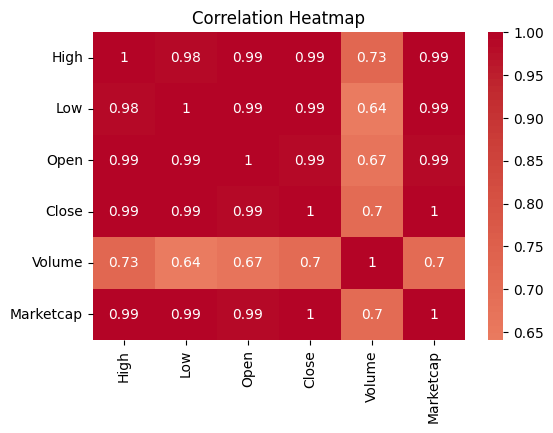

In [9]:
# Ploting correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

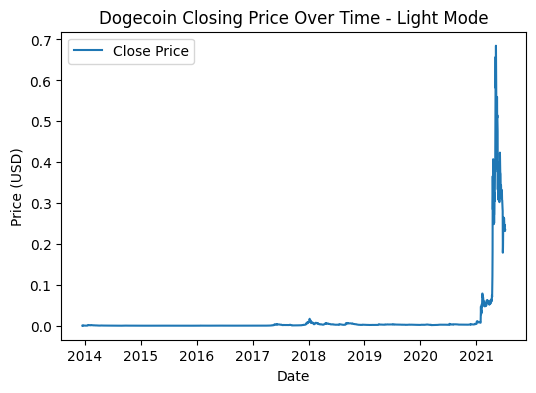

In [10]:
# Plot in light mode
plt.style.use('default')
plt.figure(figsize=(6, 4))
plt.plot(df.index, df['Close'], label='Close Price', color='tab:blue')
plt.title('Dogecoin Closing Price Over Time - Light Mode')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

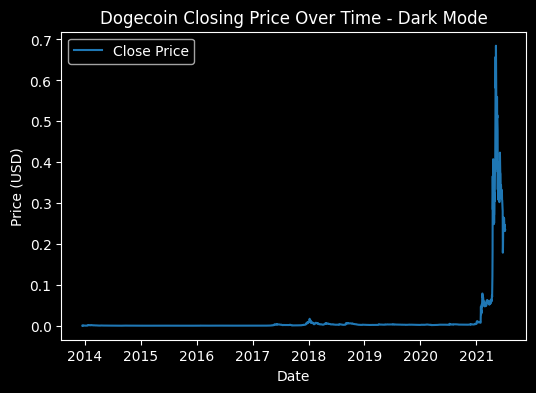

In [11]:
# Plot in dark mode
plt.style.use('dark_background')
plt.figure(figsize=(6, 4))
plt.plot(df.index, df['Close'], label='Close Price', color='tab:blue')
plt.title('Dogecoin Closing Price Over Time - Dark Mode')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

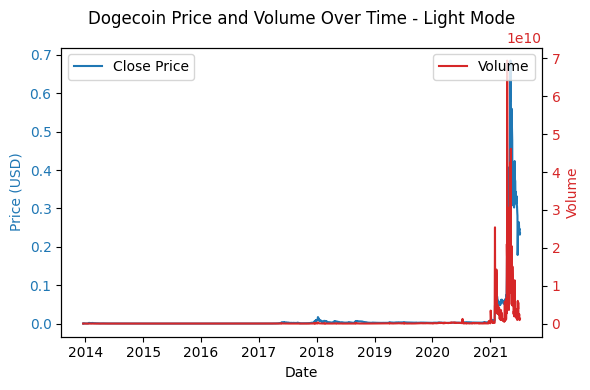

In [12]:
import matplotlib.pyplot as plt

# Light Mode Plot
plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(6,4))

# Plotting the closing price
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='tab:blue')
ax1.plot(df.index, df['Close'], label='Close Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to plot the volume
ax2 = ax1.twinx()  
ax2.set_ylabel('Volume', color='tab:red')
ax2.plot(df.index, df['Volume'], label='Volume', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and Legends
plt.title('Dogecoin Price and Volume Over Time - Light Mode')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()



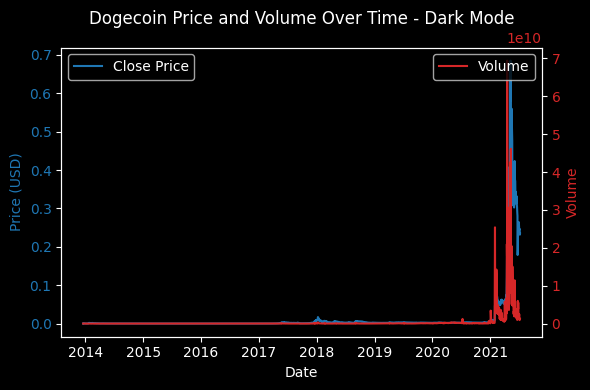

In [13]:
# Dark Mode Plot
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(6,4))

# Plotting the closing price
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='tab:blue')
ax1.plot(df.index, df['Close'], label='Close Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to plot the volume
ax2 = ax1.twinx()  
ax2.set_ylabel('Volume', color='tab:red')
ax2.plot(df.index, df['Volume'], label='Volume', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and Legends
plt.title('Dogecoin Price and Volume Over Time - Dark Mode')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


# **MODEL TRAINING AND PREDICTION:**

In [14]:
# Selecting features and target variable
X = df[['High', 'Low', 'Open', 'Volume', 'Marketcap']]
y = df['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Training and evaluating models
results = {}
predictions = pd.DataFrame(index=X_test.index)  # Create empty DataFrame for predictions

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f'{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}')
    
    # Save predictions to DataFrame
    predictions[model_name] = y_pred

# Concatenate predictions DataFrame with original X_test
X_test_with_predictions = pd.concat([X_test, predictions], axis=1)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

Linear Regression - MSE: 6.478152881225474e-08, MAE: 0.00016718051056675718, R2: 0.9999815236336301
Random Forest - MSE: 2.3960009981124547e-06, MAE: 0.00021833366405181747, R2: 0.9993166355738233
Gradient Boosting - MSE: 8.168061103803739e-07, MAE: 0.00018814885016604942, R2: 0.9997670383946595
Support Vector Regressor - MSE: 0.009316385023990145, MAE: 0.09600806602942982, R2: -1.6571299890840727
Decision Tree - MSE: 2.6947683577056393e-06, MAE: 0.00025680453073222414, R2: 0.9992314240128058


,MSE,MAE,R2
Linear Regression,6.478153e-08,0.000167,0.999982
Random Forest,2.396001e-06,0.000218,0.999317
Gradient Boosting,8.168061e-07,0.000188,0.999767
Support Vector Regressor,9.316385e-03,0.096008,-1.657130
Decision Tree,2.694768e-06,0.000257,0.999231


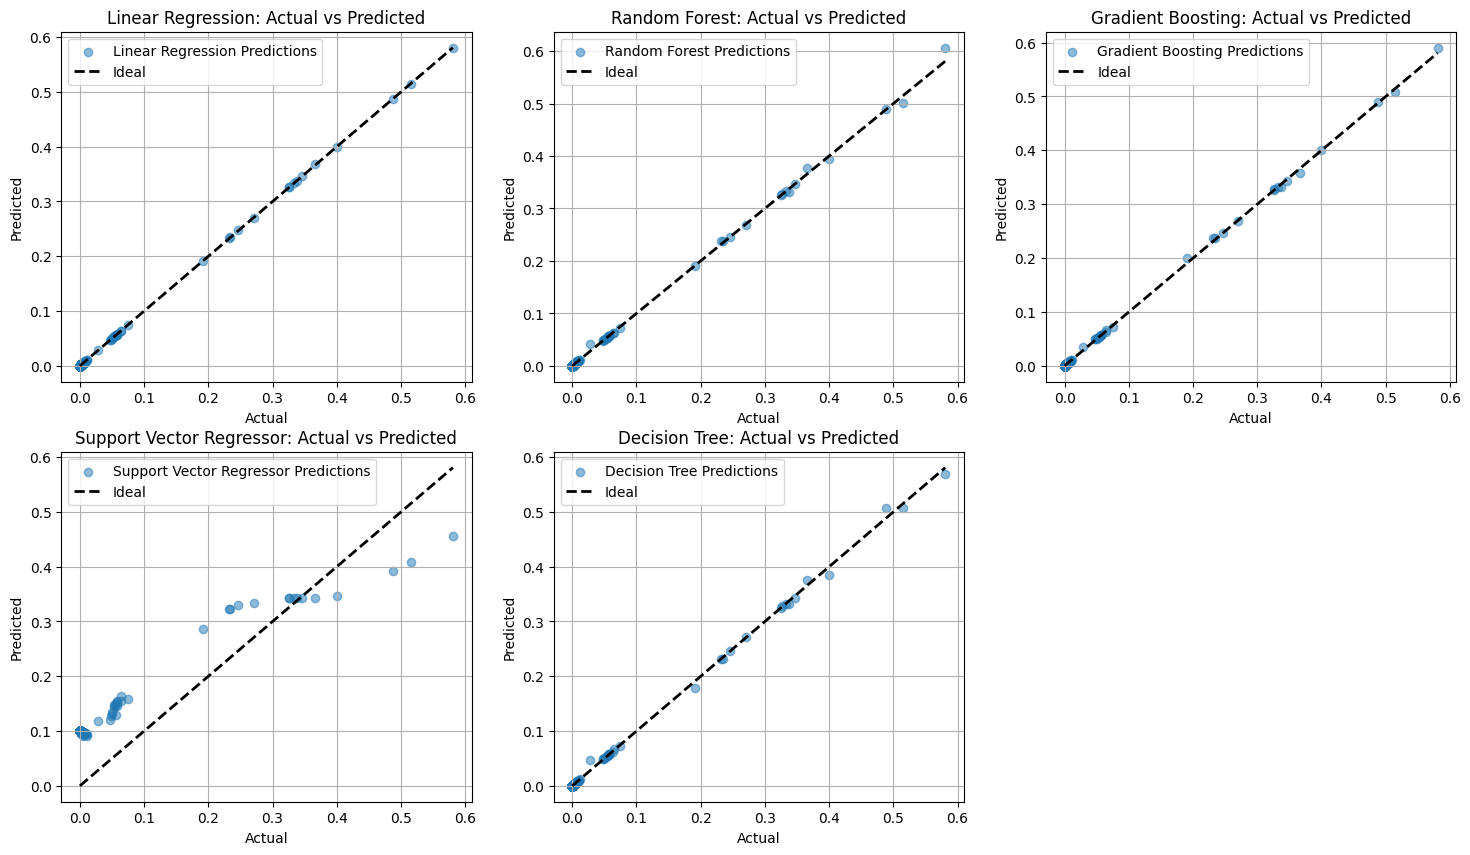

In [16]:
# Plot y_test vs y_pred for each model
plt.style.use('default')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
axes = axes.flatten()

for idx, model_name in enumerate(models.keys()):
    axes[idx].scatter(y_test, predictions[model_name], alpha=0.5, label=f'{model_name} Predictions')
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
    axes[idx].set_xlabel('Actual')
    axes[idx].set_ylabel('Predicted')
    axes[idx].set_title(f'{model_name}: Actual vs Predicted')
    axes[idx].legend()
    axes[idx].grid(True)

# Remove the last empty subplot if there's an extra one
if len(models) % 3 != 0:
    fig.delaxes(axes[-1])

plt.show()

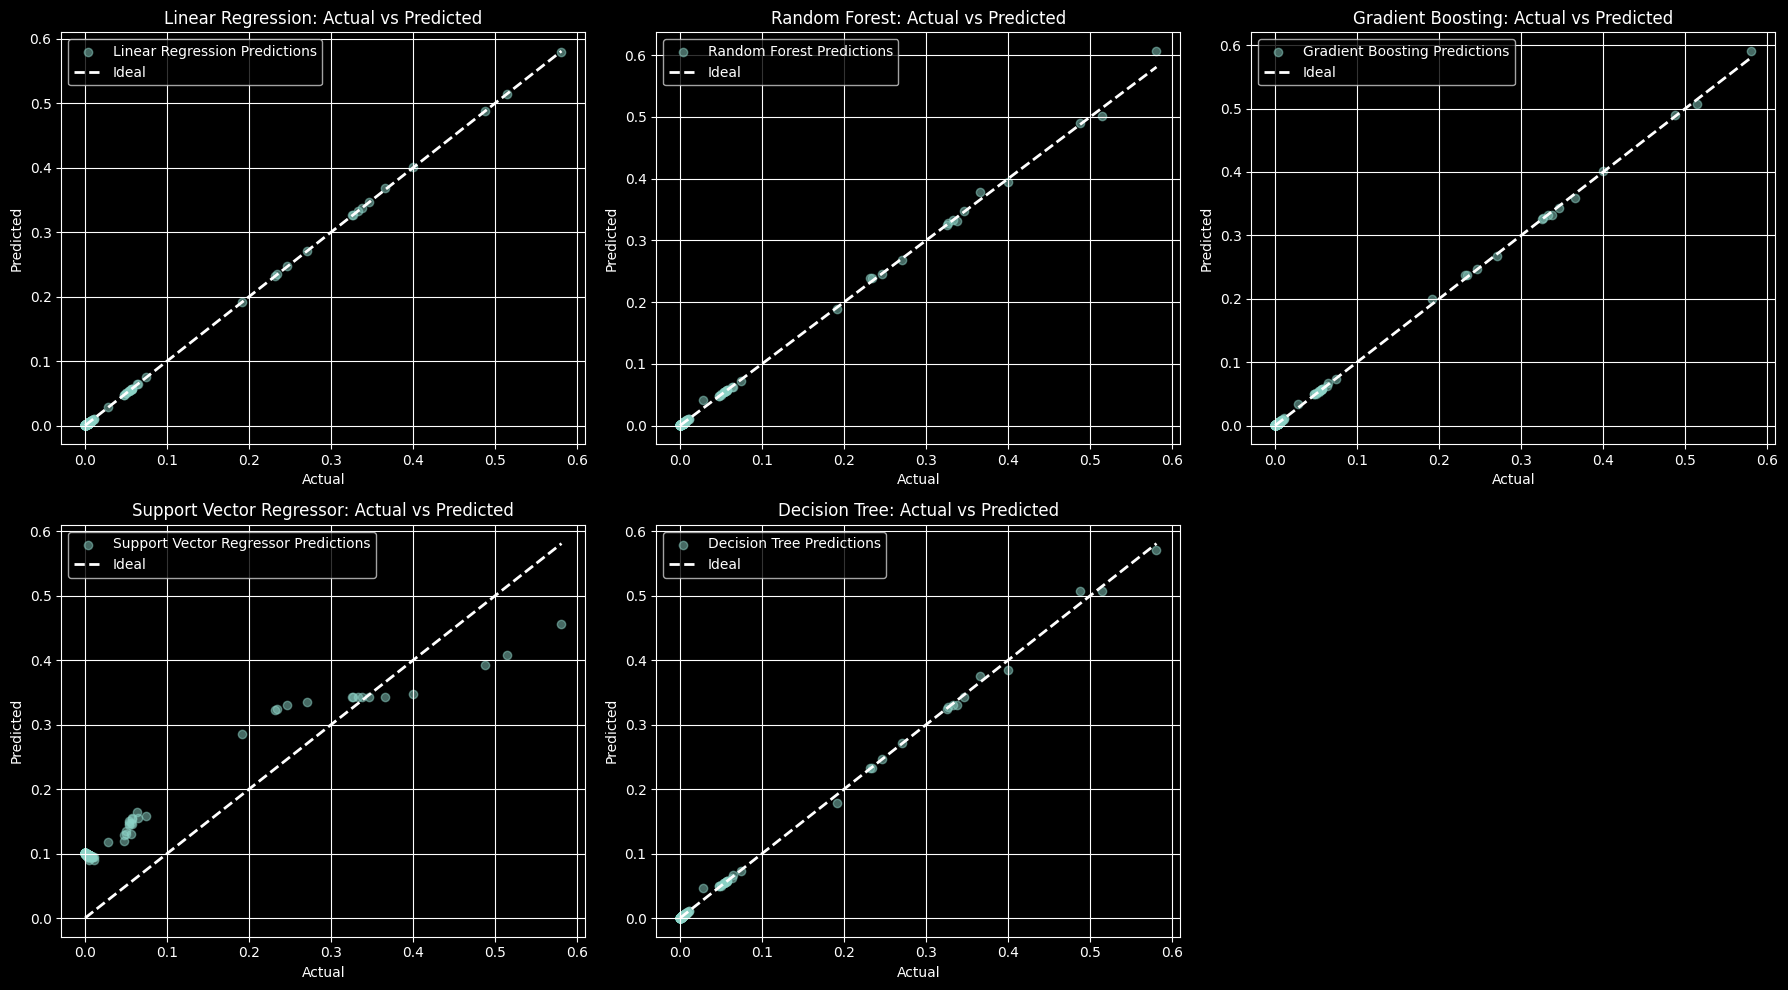

In [17]:
# Plot in dark mode
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for idx, model_name in enumerate(models.keys()):
    axes[idx].scatter(y_test, predictions[model_name], alpha=0.5, label=f'{model_name} Predictions')
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2, label='Ideal')
    axes[idx].set_xlabel('Actual')
    axes[idx].set_ylabel('Predicted')
    axes[idx].set_title(f'{model_name}: Actual vs Predicted')
    axes[idx].legend()
    axes[idx].grid(True)

# Remove the last empty subplot if there's an extra one
if len(models) % 3 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()

# Display the plot in dark mode
plt.show()

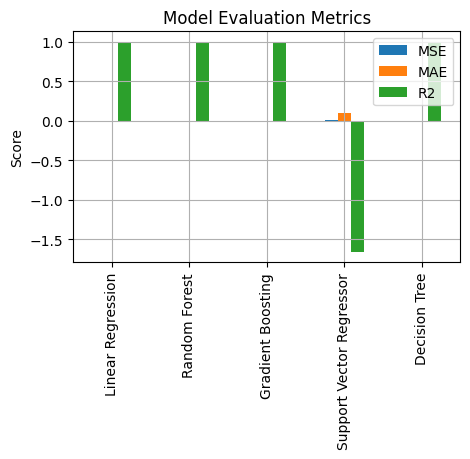

In [18]:
plt.style.use('default')

# Plotting MSE, MAE, and R2 scores for each model
fig, ax = plt.subplots(figsize=(5, 3))

results_df.plot(kind='bar', ax=ax)
ax.set_title('Model Evaluation Metrics')
ax.set_ylabel('Score')
ax.grid(True)
ax.legend(loc='upper right')
plt.show()

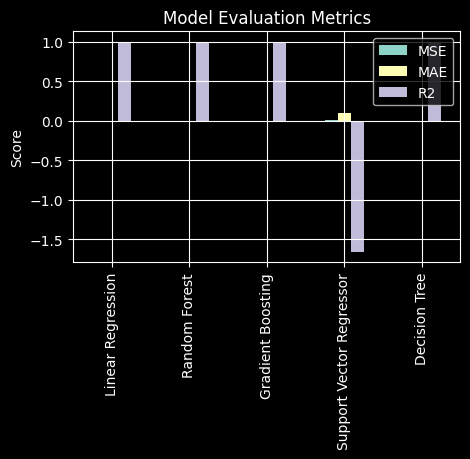

In [19]:
plt.style.use('dark_background') 

# Plotting MSE, MAE, and R2 scores for each model
fig, ax = plt.subplots(figsize=(5, 3))

results_df.plot(kind='bar', ax=ax)
ax.set_title('Model Evaluation Metrics')
ax.set_ylabel('Score')
ax.grid(True)
ax.legend(loc='upper right')
plt.show()

# **SAVING BEST MODEL:**

In [20]:
# Find and save the best model based on the lowest MSE
best_model_name = min(results, key=lambda x: results[x]['MSE'])
best_model = models[best_model_name]

# Save the best model using joblib
best_model_filename = 'best_model.pkl'
joblib.dump(best_model, best_model_filename)
print(f'Saved the best model ({best_model_name}) as {best_model_filename}')

Saved the best model (Linear Regression) as best_model.pkl


# **SAVING TEST DATASET FOR WEB APPLICATION:**

In [21]:
# Concatenate predictions DataFrame with original X_test
X_test_with_predictions = pd.concat([X_test, predictions], axis=1)

# Save the test dataset with predictions to CSV
test_dataset_with_predictions_filename = 'test_dataset_with_predictions.csv'
X_test_with_predictions.to_csv(test_dataset_with_predictions_filename, index=False)

print(f'Saved test dataset with predictions as {test_dataset_with_predictions_filename}')


Saved test dataset with predictions as test_dataset_with_predictions.csv


# **MODEL BUILDING WITHOUT LIBRARIES:**

# 1)Linear Regression:

In [22]:
class LinearRegressionCustom:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):
        # Add a column of ones for intercept term
        X = np.c_[np.ones(X.shape[0]), X]
        
        # Normal equation: theta = (X^T * X)^-1 * X^T * y
        X_transpose = np.transpose(X)
        self.coef_ = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]
        
    def predict(self, X):
        return X @ self.coef_ + self.intercept_


# 2)Random Forest Regressor:

In [23]:
class RandomForestRegressorCustom:
    def __init__(self, n_estimators=100, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        
    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            tree = DecisionTreeRegressorCustom(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)
        
    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for tree in self.trees:
            predictions += tree.predict(X)
        return predictions / self.n_estimators


# 3)Decision Tree Regressor:

In [24]:
class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None
        
    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)
        
    def _grow_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y)
        
        feature_idx, threshold = self._find_best_split(X, y)
        left_indices = X[:, feature_idx] < threshold
        right_indices = ~left_indices
        
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        
        return (feature_idx, threshold, left_subtree, right_subtree)
    
    def _find_best_split(self, X, y):
        best_mse = float('inf')
        best_feature_idx = None
        best_threshold = None
        
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = X[:, feature_idx] < threshold
                y_left = y[left_indices]
                y_right = y[~left_indices]
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                mse = np.mean((y_left - np.mean(y_left))**2) + np.mean((y_right - np.mean(y_right))**2)
                if mse < best_mse:
                    best_mse = mse
                    best_feature_idx = feature_idx
                    best_threshold = threshold
        
        return best_feature_idx, best_threshold
    
    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])
    
    def _predict_tree(self, x, tree):
        if isinstance(tree, float):
            return tree
        
        feature_idx, threshold, left_subtree, right_subtree = tree
        if x[feature_idx] < threshold:
            return self._predict_tree(x, left_subtree)
        else:
            return self._predict_tree(x, right_subtree)


# 4)Gradient Boosting:

In [25]:
class GradientBoostingRegressorCustom:
    def __init__(self, n_estimators=100, max_depth=3, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.trees = []
        
    def fit(self, X, y):
        y_pred = np.full_like(y, np.mean(y))  # Initialize with mean value
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressorCustom(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)
            y_pred += self.learning_rate * tree.predict(X)
        
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred + np.mean(y)


# 5)Support Vector Regressor(SVR):

In [26]:
class SVR:
    def __init__(self, epsilon=0.1, C=1.0, kernel='linear'):
        self.epsilon = epsilon
        self.C = C
        self.kernel = kernel
        self.X_train = None
        self.y_train = None
        self.alphas = None
        self.b = None
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        n_samples, n_features = X.shape
        
        # Initialize alphas and b
        self.alphas = np.zeros(n_samples)
        self.b = 0.0
        
        # Sequential Minimal Optimization (SMO) algorithm for solving SVM dual problem
        for _ in range(n_samples):
            for i in range(n_samples):
                Ei = self._predict(self.X_train[i]) - self.y_train[i]
                if (self.y_train[i] * Ei < -self.epsilon and self.alphas[i] < self.C) or \
                   (self.y_train[i] * Ei > self.epsilon and self.alphas[i] > 0):
                    j = np.random.choice([idx for idx in range(n_samples) if idx != i])
                    Ej = self._predict(self.X_train[j]) - self.y_train[j]
                    
                    # Save old alphas
                    alpha_i_old = self.alphas[i]
                    alpha_j_old = self.alphas[j]
                    
                    # Compute L and H
                    if self.y_train[i] != self.y_train[j]:
                        L = max(0, self.alphas[j] - self.alphas[i])
                        H = min(self.C, self.C + self.alphas[j] - self.alphas[i])
                    else:
                        L = max(0, self.alphas[j] + self.alphas[i] - self.C)
                        H = min(self.C, self.alphas[j] + self.alphas[i])
                    
                    if L == H:
                        continue
                    
                    # Compute eta
                    eta = 2 * self.X_train[i] @ self.X_train[j] - self.X_train[i] @ self.X_train[i] - self.X_train[j] @ self.X_train[j]
                    
                    if eta >= 0:
                        continue
                    
                    # Update alpha j
                    self.alphas[j] = self.alphas[j] - (self.y_train[j] * (Ei - Ej)) / eta
                    
                    # Clip alpha j
                    if self.alphas[j] > H:
                        self.alphas[j] = H
                    elif self.alphas[j] < L:
                        self.alphas[j] = L
                    
                    # Check if alpha j has not changed much
                    if abs(self.alphas[j] - alpha_j_old) < 1e-5:
                        continue
                    
                    # Update alpha i
                    self.alphas[i] = self.alphas[i] + self.y_train[i] * self.y_train[j] * (alpha_j_old - self.alphas[j])
                    
                    # Update b
                    bi = self.b - Ei - self.y_train[i] * (self.alphas[i] - alpha_i_old) * self.X_train[i] @ self.X_train[i] - \
                         self.y_train[j] * (self.alphas[j] - alpha_j_old) * self.X_train[i] @ self.X_train[j]
                    bj = self.b - Ej - self.y_train[i] * (self.alphas[i] - alpha_i_old) * self.X_train[i] @ self.X_train[j] - \
                         self.y_train[j] * (self.alphas[j] - alpha_j_old) * self.X_train[j] @ self.X_train[j]
                    
                    if 0 < self.alphas[i] < self.C:
                        self.b = bi
                    elif 0 < self.alphas[j] < self.C:
                        self.b = bj
                    else:
                        self.b = (bi + bj) / 2
        
    def _predict(self, X):
        return np.sum(self.alphas * self.y_train * self.kernel_function(self.X_train, X), axis=0) + self.b
    
    def predict(self, X):
        return self._predict(X)

    def kernel_function(self, X1, X2):
        if self.kernel == 'linear':
            return X1 @ X2.T
        elif self.kernel == 'rbf':
            gamma = 1.0 / X1.shape[1]
            return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis], axis=-1)**2)
